![example](images/director_shot.jpeg)

# Project Title

**Authors:** Harmandip Singh 
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
title_basics=pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_basics.head(4)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"


In [3]:
title_basics.shape

(146144, 6)

In [4]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
title_ratings=pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
title_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [6]:
title_ratings.shape

(73856, 3)

In [7]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
df_combined=pd.merge(title_basics,title_ratings, on='tconst')
df_combined.head(7)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [9]:
df_combined.shape

(73856, 8)

In [10]:
df_combined['genres']=df_combined['genres'].str.split(',')

In [11]:
df_combined=df_combined.explode('genres')
df_combined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


In [12]:
counts = df_combined['genres'].value_counts()
high_counts = counts[counts >= 200]

<ipython-input-13-02e944c71211>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=high_counts.index, rotation=80);


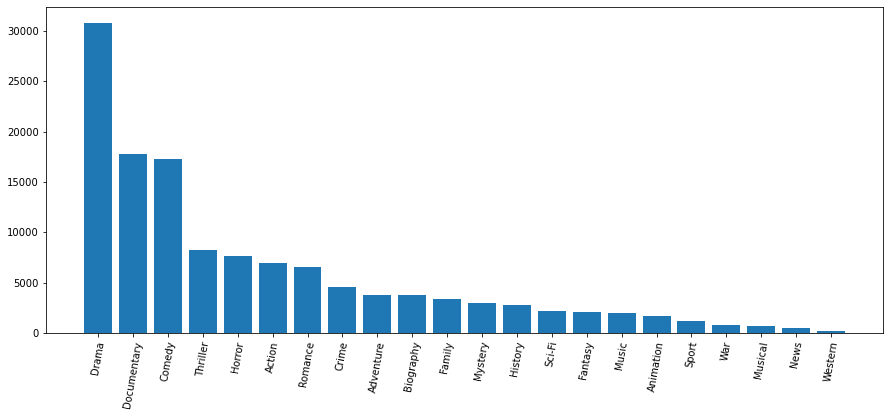

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=high_counts.index, height=high_counts)
ax.set_xticklabels(labels=high_counts.index, rotation=80);

In [14]:
by_genre=df_combined.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
by_genre.head(5)

genres
Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
Name: averagerating, dtype: float64

<ipython-input-15-a548b76a746a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=by_genre.index, rotation=80);


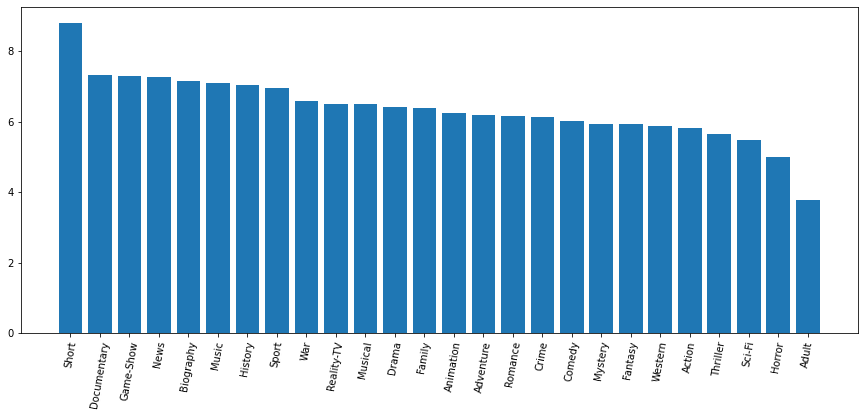

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=by_genre.index, height=by_genre)
ax.set_xticklabels(labels=by_genre.index, rotation=80);

<ipython-input-16-0029888c4fd4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=numgenre.index, rotation=80);


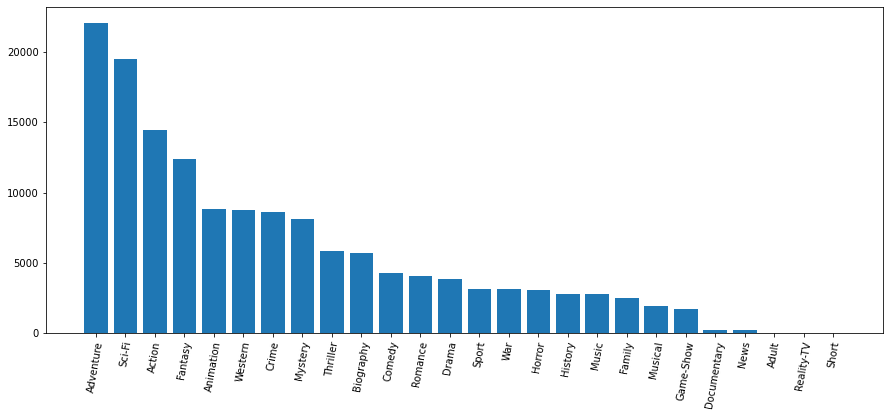

In [16]:
numgenre=df_combined.groupby('genres')['numvotes'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=numgenre.index, height=numgenre)
ax.set_xticklabels(labels=numgenre.index, rotation=80);

In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129294 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           129294 non-null  object 
 1   primary_title    129294 non-null  object 
 2   original_title   129294 non-null  object 
 3   start_year       129294 non-null  int64  
 4   runtime_minutes  118953 non-null  float64
 5   genres           128490 non-null  object 
 6   averagerating    129294 non-null  float64
 7   numvotes         129294 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 8.9+ MB


In [18]:
df_combined.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,129294.000000,118953.000000,129294.000000,1.292940e+05
mean,2014.218371,95.045640,6.303352,5.304729e+03
std,2.579059,156.455116,1.458034,3.797311e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,82.000000,5.400000,1.600000e+01
50%,2014.000000,92.000000,6.400000,6.400000e+01
75%,2016.000000,105.000000,7.300000,4.230000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [19]:
df_combined.shape

(129294, 8)

In [20]:
df_combined.rename(columns={"primary_title":"title"},inplace=True)
df_combined.head(2)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77


In [21]:
movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [22]:
movie_gross.shape

(3387, 5)

In [23]:
df_another=pd.merge(df_combined,movie_gross, on='title')
df_another.head(2)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Relbig.,1100000.0,NaN,2016


In [24]:
df_another['foreign_gross']=df_another['foreign_gross'].str.replace(',', '')
df_another['foreign_gross']=pd.to_numeric(df_another['foreign_gross'],downcast='float')



In [25]:
df_another.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False).head(2)

genres
Sci-Fi       1.115925e+08
Adventure    9.542850e+07
Name: domestic_gross, dtype: float64

<ipython-input-26-09eab302ef30>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=domesticgenre.index, rotation=80);


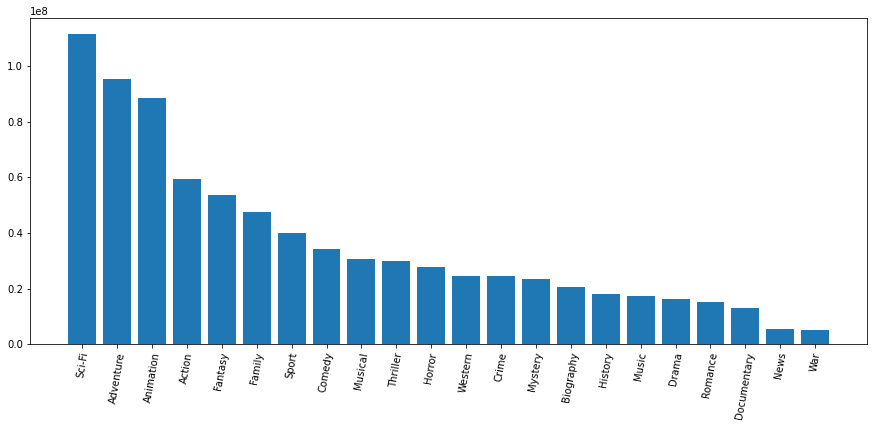

In [26]:
domesticgenre=df_another.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=domesticgenre.index, height=domesticgenre)
ax.set_xticklabels(labels=domesticgenre.index, rotation=80);

<ipython-input-27-4c13dbffe0ce>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=foreigngenre.index, rotation=80);


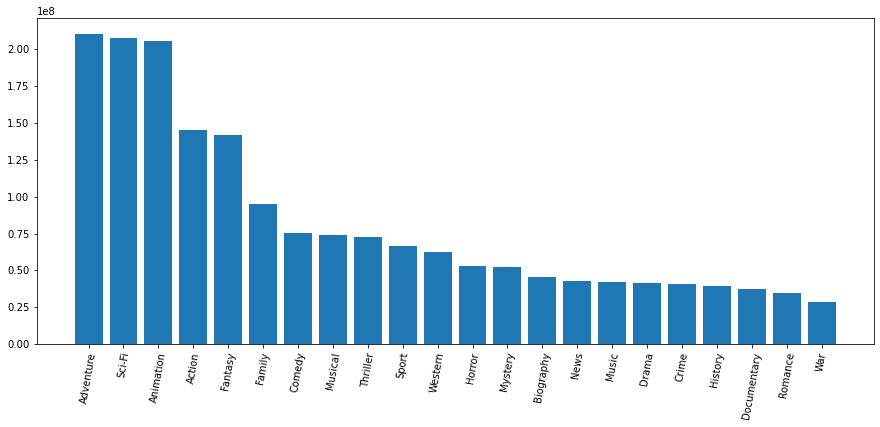

In [27]:
foreigngenre=df_another.groupby('genres')['foreign_gross'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=foreigngenre.index, height=foreigngenre)
ax.set_xticklabels(labels=foreigngenre.index, rotation=80);

In [28]:
df_another.shape

(6985, 12)

In [29]:
df_clean = df_combined.dropna(   
                                axis=0, 
                                subset=['runtime_minutes']
)
df_clean['runtime_minutes'].tail()

73850    86.0
73851    75.0
73852    98.0
73852    98.0
73855    72.0
Name: runtime_minutes, dtype: float64

In [30]:
low_length=df_another[df_another['runtime_minutes']<=200]


In [31]:
low_length_two=low_length[low_length['domestic_gross']>=100000000]

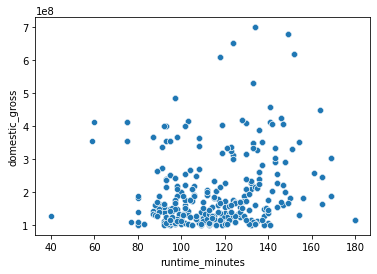

In [32]:
sns.scatterplot(data=low_length_two, x='runtime_minutes', y='domestic_gross');

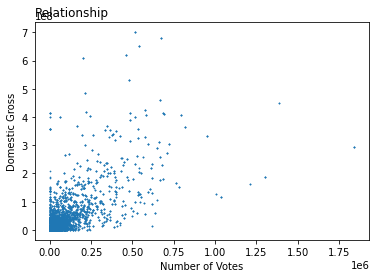

In [33]:
plt.plot( 'numvotes', 'domestic_gross', "", data=low_length, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Number of Votes')
plt.ylabel('Domestic Gross')
plt.title('Relationship', loc='left')
plt.show()

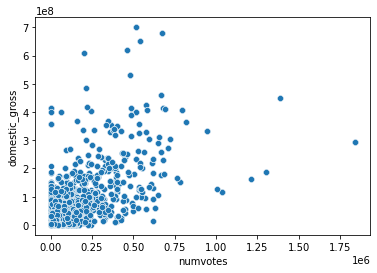

In [34]:
#[ANSWER FROM EXERCISE]

sns.scatterplot(data=low_length, x='numvotes', y='domestic_gross');

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

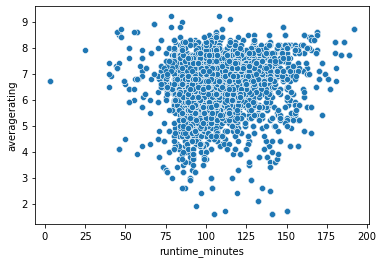

In [35]:
sns.scatterplot(data=low_length, x='runtime_minutes', y='averagerating')

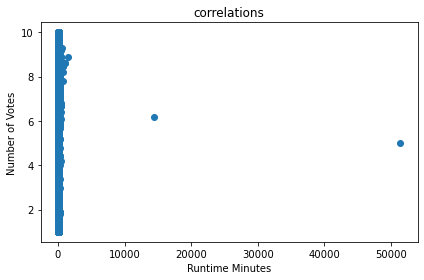

In [36]:
fig, ax = plt.subplots()

ax.scatter(df_combined['runtime_minutes'] , df_combined['averagerating'])
ax.set_xlabel('Runtime Minutes')
ax.set_ylabel('Number of Votes')
ax.set_title('correlations')

plt.tight_layout()

In [37]:
df_combined.shape

(129294, 8)

In [38]:
df_combined.duplicated().value_counts()

False    129294
dtype: int64

In [39]:
df_combined.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)

KeyError: 'Column not found: domestic_gross'

In [ ]:
movie_gross=pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
movie_gross

In [ ]:
movie_gross.columns

In [ ]:
movie_gross.groupby('studio')['domestic_gross'].mean().head(20)

In [ ]:
movie_gross.info()

In [ ]:
movie_gross.describe

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [44]:
title_crew=pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
title_crew.head(30)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"


In [46]:
title_crew['directors'].value_counts

<bound method IndexOpsMixin.value_counts of 0                             nm0899854
1                                   NaN
2                             nm1940585
3                             nm0151540
4         nm0089502,nm2291498,nm2292011
                      ...              
146139                       nm10122357
146140                        nm6711477
146141            nm10123242,nm10123248
146142                        nm4993825
146143                              NaN
Name: directors, Length: 146144, dtype: object>